### Project Name - Retail Analysis
#### Group Members:
##### Joshi Abraham
##### Jubil Gea Joy
##### Monjima Kundu
##### Nikhil Shriyan
##### Nirmal
##### Tejas Shirke

#### Reading dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [3]:
# DataSets Used 
#olist_customers_dataset.csv --> Dataset that provides details about customers
#olist_order_items_dataset.csv --> Dataset that provides details about ordered items
#olist_order_payments_dataset.csv --> Dataset that provides details about payments
#olist_order_reviews_dataset.csv --> Dataset that provides details about review of products
#olist_orders_dataset.csv --> Dataset that provides details about orders
#olist_products_dataset.csv --> Dataset that provides details about products
#olist_sellers_dataset.csv --> Dataset that provides details about sellers
#product_category_name_translation.csv --> Dataset that provides details about product category

In [4]:
# Reading data set

df = pd.read_csv("Merged.csv")
df.head()

,Unnamed: 0,product_id,product_category_name,product_category_name_english,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_value,review_score,seller_zip_code_prefix,seller_city,seller_state
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,f8a3e963a310aa58b60a5b1fed5bceb5,b1a1199364a4a7fe27c4486ab63f550d,13848,mogi-guacu,SP,e17e4f88e31525f7deef66779844ddce,...,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,18.30,5,3694,sao paulo,SP
1,1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,perfumery,c15eed3881abc9e06763c989679c5094,48d6d950c0aba132537fc335c0c56e01,5893,sao paulo,SP,5fa78e91b5cb84b6a8ccc42733f95742,...,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,24.68,2,1026,sao paulo,SP
2,2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,perfumery,12a2c614dfc8926e793516b1638c7471,7139ee1d2ad919a82b6e68a29582264e,6519,santana de parnaiba,SP,048cc42e03ca8d43c729adf6962cb348,...,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,24.68,5,1026,sao paulo,SP
3,3,0d009643171aee696f4733340bc2fdd0,perfumaria,perfumery,6d699e3ab0fd90fffb3d1379d937de77,0b3dc7efaafb0cf78a4796d42fa8d74c,22410,rio de janeiro,RJ,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,...,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,356.13,5,13030,campinas,SP
4,4,0d009643171aee696f4733340bc2fdd0,perfumaria,perfumery,38248f5e3248ffe52b20c510522b04f5,376c9c37aea85ca26315dfe54b3e4c93,9930,diadema,SP,b034b38968b7bc21648e36e05d2eb09f,...,1,fe2032dab1a61af8794248c8196565c9,2017-08-31 16:25:17,339.00,11.19,350.19,4,13030,campinas,SP


In [5]:
#Dropping unwanted columns
# We're dropping the "product_category_name" column be cause it's a duplicate column in another language and we have the same in english

df.drop(columns =['order_purchase_timestamp','seller_zip_code_prefix','customer_zip_code_prefix','product_category_name'],axis=1,inplace=True)

In [6]:
df

,Unnamed: 0,product_id,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_approved_at,...,order_estimated_delivery_date,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_value,review_score,seller_city,seller_state
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,f8a3e963a310aa58b60a5b1fed5bceb5,b1a1199364a4a7fe27c4486ab63f550d,mogi-guacu,SP,e17e4f88e31525f7deef66779844ddce,delivered,2018-04-24 19:04:19,...,2018-05-09 00:00:00,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,18.30,5,sao paulo,SP
1,1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,c15eed3881abc9e06763c989679c5094,48d6d950c0aba132537fc335c0c56e01,sao paulo,SP,5fa78e91b5cb84b6a8ccc42733f95742,delivered,2017-12-08 16:33:14,...,2017-12-18 00:00:00,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,24.68,2,sao paulo,SP
2,2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,12a2c614dfc8926e793516b1638c7471,7139ee1d2ad919a82b6e68a29582264e,santana de parnaiba,SP,048cc42e03ca8d43c729adf6962cb348,delivered,2017-11-17 21:35:39,...,2017-11-29 00:00:00,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,24.68,5,sao paulo,SP
3,3,0d009643171aee696f4733340bc2fdd0,perfumery,6d699e3ab0fd90fffb3d1379d937de77,0b3dc7efaafb0cf78a4796d42fa8d74c,rio de janeiro,RJ,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,delivered,2017-07-28 09:50:14,...,2017-08-21 00:00:00,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,356.13,5,campinas,SP
4,4,0d009643171aee696f4733340bc2fdd0,perfumery,38248f5e3248ffe52b20c510522b04f5,376c9c37aea85ca26315dfe54b3e4c93,diadema,SP,b034b38968b7bc21648e36e05d2eb09f,delivered,2017-08-27 16:25:17,...,2017-09-08 00:00:00,1,fe2032dab1a61af8794248c8196565c9,2017-08-31 16:25:17,339.00,11.19,350.19,4,campinas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,115604,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,63155d2512ff588adce41f3fb43f6a6d,f55304849386dd15f067691bd606d75a,passo fundo,RS,d4e8d3bb5e3673ed68ac154fe86de946,delivered,2017-10-24 11:29:30,...,2017-11-29 00:00:00,1,4e922959ae960d389249c378d1c939f5,2017-11-03 11:29:30,45.00,16.11,61.11,5,jacarei,SP
115605,115605,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,bc2ce0dc451a51eccc64691f8f9de54a,17be6cead254c429e33adb6da0cb6352,sao paulo,SP,264f3762919b6ad2a8cae65fd1202106,delivered,2017-11-01 21:05:53,...,2017-11-21 00:00:00,1,4e922959ae960d389249c378d1c939f5,2017-11-13 21:05:23,65.00,9.94,74.94,5,jacarei,SP
115606,115606,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,f81bb64a1e672e6cbd0e027046db8533,b8b6643025dbcaa0e516a72f6d0d0717,porto alegre,RS,615ca9b2afeaf5644ae8cef64797132e,delivered,2017-08-08 04:25:31,...,2017-09-08 00:00:00,1,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.00,16.11,122.22,5,jacarei,SP
115607,115607,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,f81bb64a1e672e6cbd0e027046db8533,b8b6643025dbcaa0e516a72f6d0d0717,porto alegre,RS,615ca9b2afeaf5644ae8cef64797132e,delivered,2017-08-08 04:25:31,...,2017-09-08 00:00:00,2,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.00,16.11,122.22,5,jacarei,SP


In [7]:
# descriptive statistic parameters for the datase
df.describe()

,Unnamed: 0,order_item_id,price,freight_value,payment_value,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,57804.000000,1.194535,120.619850,20.056880,172.387379,4.034409
std,33373.587973,0.685926,182.653476,15.836184,265.873969,1.385584
min,0.000000,1.000000,0.850000,0.000000,0.000000,1.000000
25%,28902.000000,1.000000,39.900000,13.080000,60.870000,4.000000
50%,57804.000000,1.000000,74.900000,16.320000,108.050000,5.000000
75%,86706.000000,1.000000,134.900000,21.210000,189.480000,5.000000
max,115608.000000,21.000000,6735.000000,409.680000,13664.080000,5.000000


In [9]:
df.describe(include='all')

,Unnamed: 0,product_id,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_approved_at,...,order_estimated_delivery_date,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_value,review_score,seller_city,seller_state
count,115609.000000,115609,115609,115609,115609,115609,115609,115609,115609,115595,...,115609,115609.000000,115609,115609,115609.000000,115609.000000,115609.000000,115609.000000,115609,115609
unique,NaN,32171,71,96516,93396,4093,27,96516,7,88332,...,449,NaN,3028,91386,NaN,NaN,NaN,NaN,604,23
top,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,bed_bath_table,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:43:31,...,2017-12-20 00:00:00,NaN,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,NaN,NaN,sao paulo,SP
freq,NaN,533,11847,63,75,18267,48797,63,113210,63,...,649,NaN,2128,63,NaN,NaN,NaN,NaN,28811,82417
mean,57804.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.194535,NaN,NaN,120.619850,20.056880,172.387379,4.034409,NaN,NaN
std,33373.587973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.685926,NaN,NaN,182.653476,15.836184,265.873969,1.385584,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,0.850000,0.000000,0.000000,1.000000,NaN,NaN
25%,28902.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,39.900000,13.080000,60.870000,4.000000,NaN,NaN
50%,57804.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,74.900000,16.320000,108.050000,5.000000,NaN,NaN
75%,86706.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,134.900000,21.210000,189.480000,5.000000,NaN,NaN


In [31]:
grouped_pid=df.groupby(['product_category_name_english']).count()[['product_id']] 
grouped_pid[grouped_pid['product_id'] > 1].sort_values (np.count('product_id'),ascending=False)

AttributeError: module 'numpy' has no attribute 'count'

In [ ]:
# 71 Products have been puchased multiple times . 

In [11]:
#Top 5 products purchased maximum number of times
grouped_pid[grouped_pid['product_id'] > 1].sort_values ('product_id',ascending=False).head(5)

,product_id
product_category_name_english,
bed_bath_table,11847
health_beauty,9944
sports_leisure,8942
furniture_decor,8743
computers_accessories,8105


In [12]:
#Top 5 Customers who have purchased multiple times

grouped_cid=df.groupby('customer_id').count()[['product_id']]
grouped_cid[grouped_cid['product_id'] > 1].sort_values ('product_id',ascending=False).head(5)

,product_id
customer_id,
270c23a11d024a44c896d1894b261a83,63
13aa59158da63ba0e93ec6ac2c07aacb,38
9af2372a1e49340278e7c1ef8d749f34,29
92cd3ec6e2d643d4ebd0e3d6238f69e2,26
2ba91e12e5e4c9f56b82b86d9031d329,24


In [13]:
#  Top 5 states with more freight_value 

df.groupby('customer_state').mean()[['freight_value']].sort_values('freight_value',ascending=False).head(5)


,freight_value
customer_state,
RR,43.587000
PB,43.436850
RO,41.077849
AC,40.232473
TO,40.007778


In [14]:
#Top 5 Customers and their cities who have purchased multiple times

grouped_cid=df.groupby(['customer_id','customer_city']).count()[['product_id']]
grouped_cid[grouped_cid['product_id'] > 1].sort_values ('product_id',ascending=False).head(5)

,,product_id
customer_id,customer_city,
270c23a11d024a44c896d1894b261a83,sao paulo,63
13aa59158da63ba0e93ec6ac2c07aacb,rio de janeiro,38
9af2372a1e49340278e7c1ef8d749f34,cuiaba,29
92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,26
2ba91e12e5e4c9f56b82b86d9031d329,suzano,24


In [ ]:
 We can see that these are the top 5 purchasers are notably 2 are from Sao Paulo

In [15]:
#Top 5 Customers who have paid maximum

grouped_cid=df.groupby(['price','customer_id','product_category_name_english']).count()[['product_id']] 
grouped_cid.sort_values ('price',ascending=False).head(5)

,,,product_id
price,customer_id,product_category_name_english,
6735.0,c6e2731c5b391845f6800c97401a43a9,housewares,1
6499.0,3fd6777bbce08a352fddd04e4a7cc8f6,art,1
4799.0,df55c14d1476a9a3467f131269c2477f,small_appliances,1
4690.0,24bbf5fd2f2e1b359ee7de94defc4a15,small_appliances,1
4590.0,3d979689f636322c62418b6346b1c6d2,computers,1


In [ ]:
product_id refers to the count of the product
We have determined the top 5 highest priced products above. notably, 2 are of small_appliance category

In [19]:
df[['order_delivered_customer_date','order_approved_at']] = df[['order_delivered_customer_date','order_approved_at']].apply(pd.to_datetime) #if conversion required
df['date_difference'] = abs((df['order_delivered_customer_date'] - df['order_approved_at'])).dt.days
df['date_difference'].head()

0     2.0
1     5.0
2     5.0
3    11.0
4     3.0
Name: date_difference, dtype: float64

In [20]:
#maximum time to deliver the product 
df[['order_delivered_customer_date','order_approved_at','date_difference','customer_state','seller_state','product_category_name_english']].sort_values(by='date_difference',ascending=False).head(50)

,order_delivered_customer_date,order_approved_at,date_difference,customer_state,seller_state,product_category_name_english
26955,2018-09-19 23:24:07,2018-02-23 15:16:14,208.0,RJ,SP,cool_stuff
99155,2017-09-19 14:38:21,2017-03-09 13:26:57,194.0,PI,SP,watches_gifts
23471,2017-09-19 14:00:04,2017-03-08 22:47:40,194.0,SE,MG,musical_instruments
78139,2017-09-19 14:33:17,2017-03-08 18:09:02,194.0,PI,SP,office_furniture
108347,2017-09-19 15:12:50,2017-03-09 01:11:33,194.0,PA,MG,consoles_games
97071,2018-07-13 20:51:31,2018-01-03 10:31:15,191.0,SP,SP,home_construction
35549,2017-09-19 17:00:07,2017-03-13 20:17:10,189.0,SP,RS,furniture_decor
80899,2017-09-19 14:38:18,2017-03-15 11:24:27,188.0,SE,SP,auto
29609,2017-09-19 16:28:58,2017-03-16 11:36:00,187.0,AP,SP,furniture_decor
35611,2017-09-19 16:28:58,2017-03-16 11:36:00,187.0,AP,SP,furniture_decor


In [ ]:
The maximum date difference between order approved and order delivered is 208 days

<Figure size 1080x576 with 0 Axes>

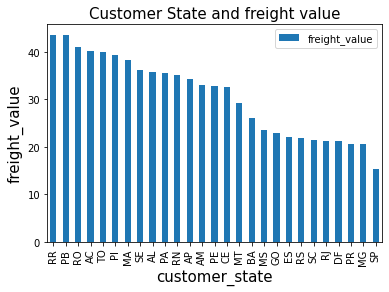

In [21]:
plt.figure(figsize = (15,8))
df_freight=df.groupby('customer_state').mean()[['freight_value']].sort_values('freight_value',ascending=False).plot.bar()
plt.xlabel("customer_state", fontsize = 15)
plt.ylabel("freight_value", fontsize = 15)
plt.title("Customer State and freight value", fontsize = 15)
plt.show()




In [ ]:
# Freight value is heighest for RR and PB and SP have the lowest freight value

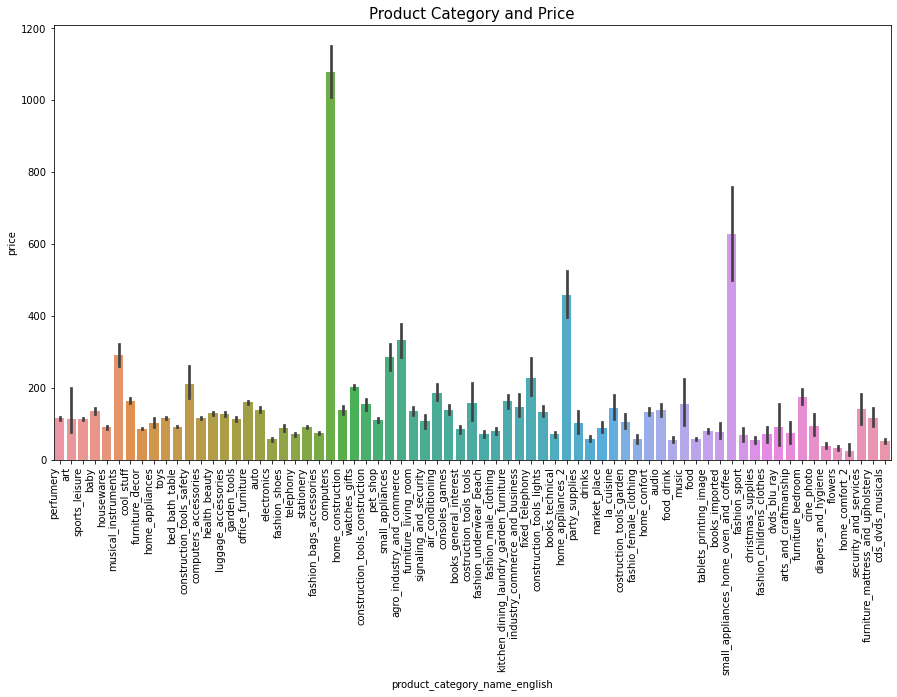

In [23]:
# Finding out the product category with highest and lowest price
plt.figure(figsize = (15,8))
plot_price=sns.barplot(x='product_category_name_english',y='price',data=df)
plt.draw()
plot_price.set_xticklabels(labels=plot_price.get_xticklabels(), rotation=90, ha="right")
plt.title("Product Category and Price", fontsize = 15)
plt.show()



In [ ]:
#The products in the category name Computer have the highest price and products in the category name home comfort 2 have the lowest price

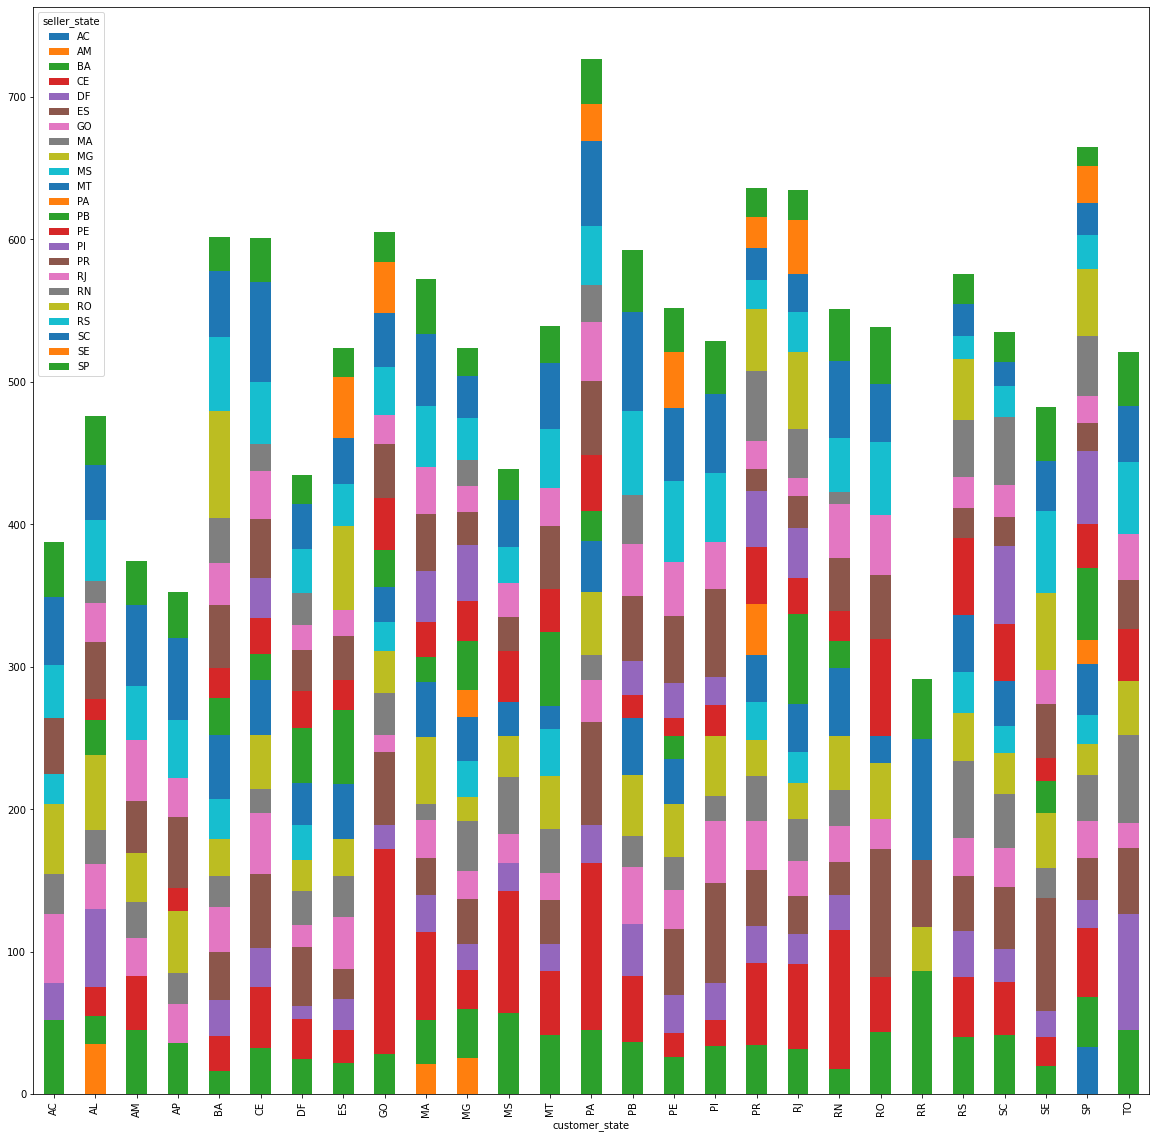

In [24]:
# Seller State and Customer State
pivot= pd.pivot_table(df,index = 'customer_state', columns = 'seller_state',values = 'freight_value',aggfunc= 'mean')
pivot
barplot=pivot.plot.bar(stacked =True,figsize = (20,20))
plt.show()

In [ ]:
We were trying to establish that sellers and customers originate from the same state and thereby the lower freight charge in the SP state but the graph could not establish the correct correlation

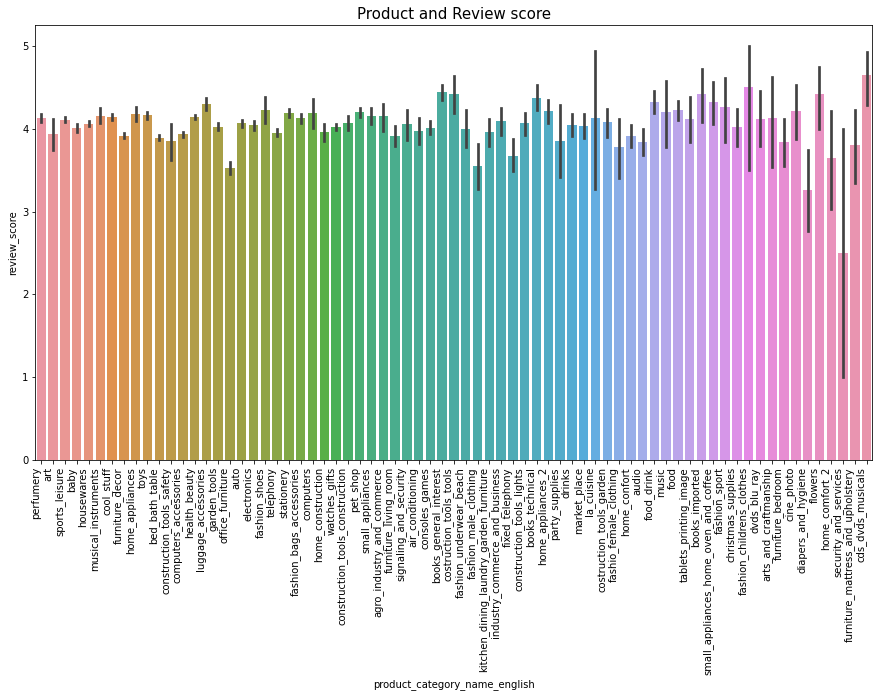

In [25]:
# Product and review score
plt.figure(figsize = (15,8))
plot_review=sns.barplot(x='product_category_name_english',y='review_score',data=df)
plt.draw()
plot_review.set_xticklabels(labels=plot_review.get_xticklabels(), rotation=90, ha="right")
plt.title("Product and Review score", fontsize = 15)
plt.show()



In [ ]:
#cds_dvds_musicals has the highest review score and security and services has the least . 
#All most all the products has review score > 3.5

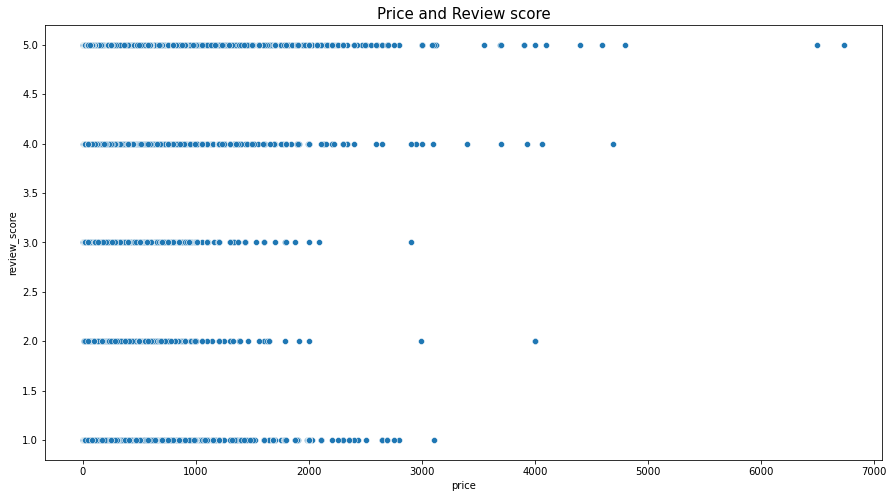

In [26]:
#Relationship between price and review score
plt.figure(figsize = (15,8))
plot_review=sns.scatterplot(x='price',y='review_score',data=df)
#plt.draw()
#plot_review.set_xticklabels(labels=plot_review.get_xticklabels(), rotation=90, ha="right")
plt.title("Price and Review score", fontsize = 15)
plt.show()

In [ ]:
#The price does not have any effect on review score

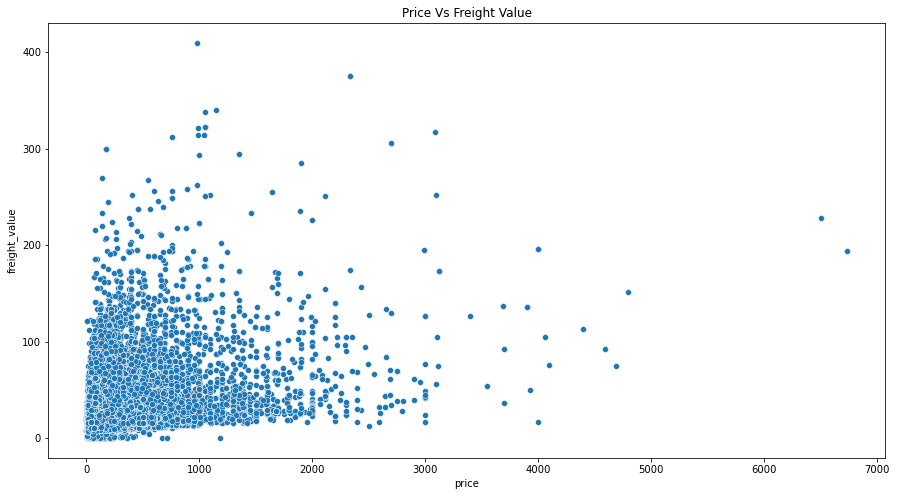

In [27]:
# Relationship between price and freight value
plt.figure(figsize = (15,8))
sns.scatterplot(x ='price',y='freight_value',data=df)
plt.title('Price Vs Freight Value')
plt.show()

In [ ]:
# There is no significance difference between Freight value and price

<Figure size 1080x576 with 0 Axes>

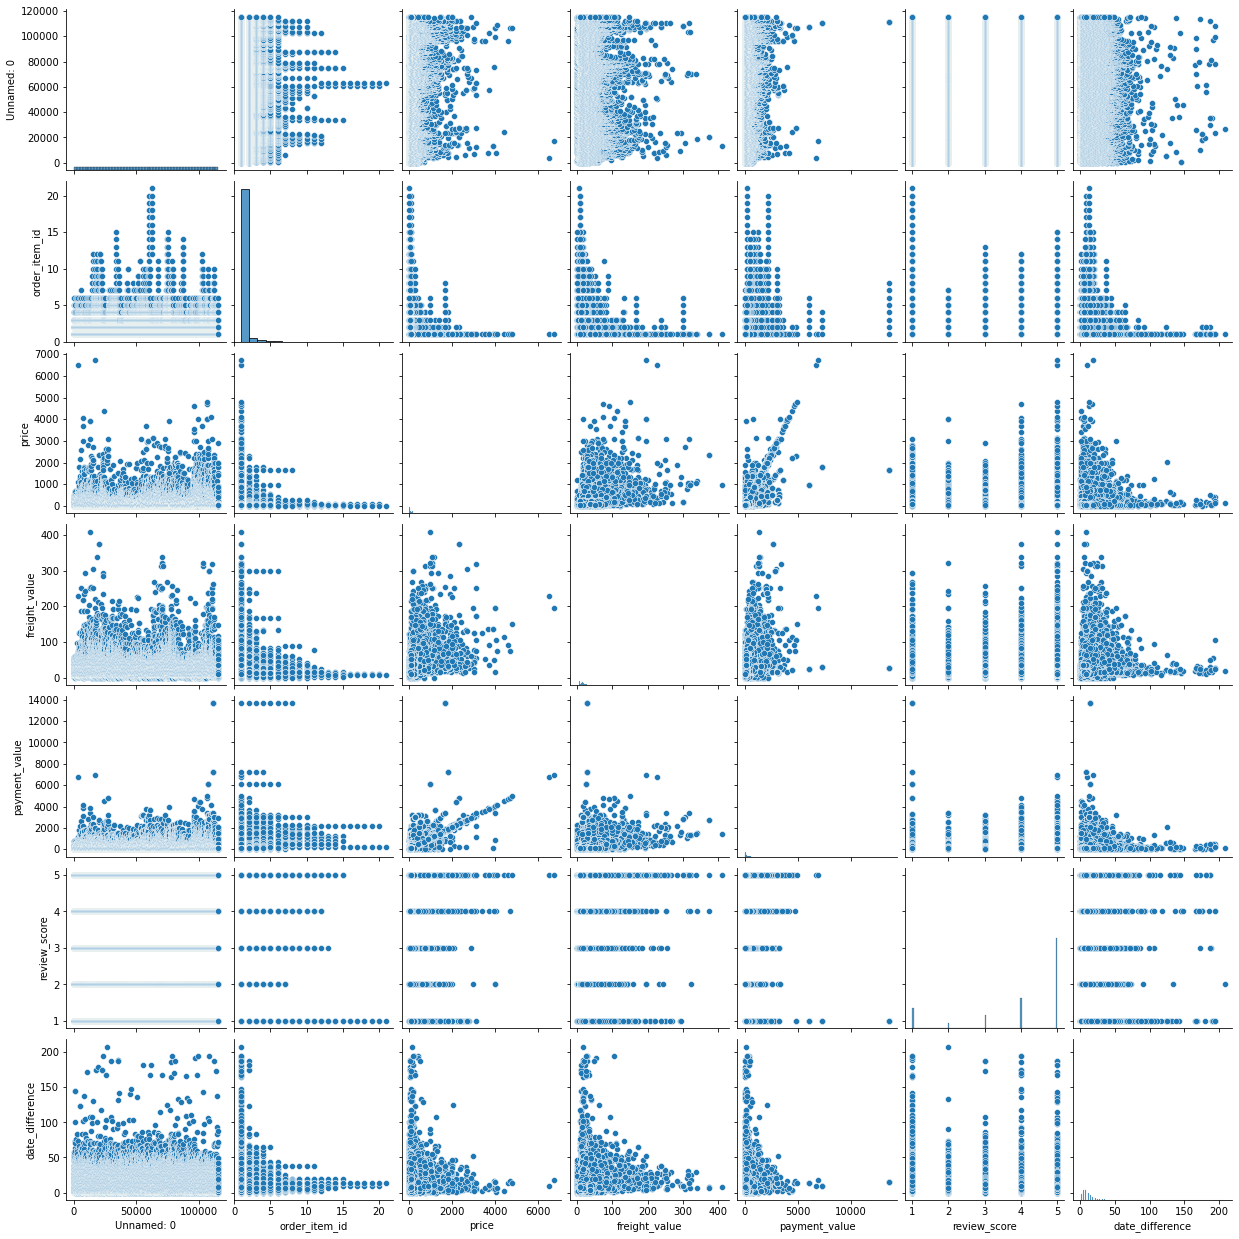

In [28]:
plt.figure(figsize=(15,8))
sns.pairplot(df)

#### DATA CLEANING

In [29]:
# Missing value imputation
df.isnull().sum()

Unnamed: 0                          0
product_id                          0
product_category_name_english       0
customer_id                         0
customer_unique_id                  0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
order_item_id                       0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_value                       0
review_score                        0
seller_city                         0
seller_state                        0
date_difference                  2414
dtype: int64

In [30]:
df.isnull().sum()/len(df)*100

Unnamed: 0                       0.000000
product_id                       0.000000
product_category_name_english    0.000000
customer_id                      0.000000
customer_unique_id               0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_approved_at                0.012110
order_delivered_carrier_date     1.033657
order_delivered_customer_date    2.075963
order_estimated_delivery_date    0.000000
order_item_id                    0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
payment_value                    0.000000
review_score                     0.000000
seller_city                      0.000000
seller_state                     0.000000
date_difference                  2.088073
dtype: float64

In [ ]:
## Treating null values - The columns order_delivered_carrier_date, order_delivered_customer_date, order_approved_at 
# These columns have very small null values so we will drop the rows with null values

In [ ]:
#1. order_delivered_carrier_date
df_na = df['order_delivered_carrier_date'].isnull()
df_na.index

In [ ]:
df_na = df['order_delivered_carrier_date'].isnull()
df_na.index[df_na==True].tolist()

In [ ]:
df = df.drop(df_na.index[df_na==True].tolist())

In [ ]:
df['order_delivered_carrier_date'].isnull().sum()

In [ ]:
#2. order_delivered_customer_date 

df_na = df['order_delivered_customer_date'].isnull()
df_na.index

In [ ]:
df_na = df['order_delivered_customer_date'].isnull()
df_na.index[df_na==True].tolist()

In [ ]:
df = df.drop(df_na.index[df_na==True].tolist())

In [ ]:
df['order_delivered_customer_date'].isnull().sum()

In [ ]:
#3. order_approved_at 

df_na = df['order_approved_at'].isnull()
df_na.index

In [ ]:
df_na = df['order_approved_at'].isnull()
df_na.index[df_na==True].tolist()

In [ ]:
df = df.drop(df_na.index[df_na==True].tolist())

In [ ]:
df['order_approved_at'].isnull().sum()

In [ ]:
# Checking the data type of the object
df.info()

In [ ]:
# Checking for any duplicate entries
df.duplicated()

In [ ]:
duplicate = df[df.duplicated()]
duplicate

In [ ]:
# Finding outliers - price,freight_value,payment_value,review_score
#1. Price
plt.figure(figsize=(15,10))
sns.boxplot(df['price'])
plt.show()

In [ ]:
df['price'].skew() # It is right skewed

In [ ]:
df['price'].var()

In [ ]:
df['price'].mean()

In [ ]:
df['price'].median()

In [ ]:
#df['price'].skew()
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR= Q3-Q1
UL = Q3+(1.5*IQR)
UL
#Anything above UL is extreme outlier
LL = Q1-(1.5*IQR)
updated_df = df[(df['price']>LL) & (df['price']<UL)]
updated_df

In [ ]:
updated_df['price'].skew() # The skewness is still >1 

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(updated_df['price'])
plt.show()

In [ ]:
updated_df['Log_Price'] = np.log(updated_df['price'])
updated_df

In [ ]:
updated_df['Log_Price'] = np.log(updated_df['price']) # Still the skewnessis not symmetric

In [ ]:
#to reduce the skewness further, we can use square root transformation 
#or log transformation
#then calculate skewness again
#(brb)

In [ ]:
updated_df['Sqrt_Price'] = np.sqrt(updated_df['price'])

In [ ]:
updated_df['Sqrt_Price'].skew() # #We see that Sqrt transformation helps bring the skewness down to 0.3 and now the data is 
                                    #fairly symmetrical

In [ ]:
updated_df['Sqrt_Price'].kurt() # fairly normal distribution

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(updated_df['Sqrt_Price'])
plt.show()

In [ ]:
#2.freight_value
plt.figure(figsize=(15,10))
sns.boxplot(df['freight_value'])
plt.show()

In [ ]:
df['freight_value'].skew() # It is right skewed

In [ ]:
df['freight_value'].mean()

In [ ]:
df['freight_value'].var()

In [ ]:
df['freight_value'].median()

In [ ]:
Q1 = df['freight_value'].quantile(0.25)
Q3 = df['freight_value'].quantile(0.75)
IQR= Q3-Q1
UL = Q3+(1.5*IQR)
UL
#Anything above UL is extreme outlier
LL = Q1-(1.5*IQR)
updated_df = df[(df['freight_value']>LL) & (df['freight_value']<UL)]
updated_df

In [ ]:
updated_df['freight_value'].skew() 

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(updated_df['freight_value'])
plt.show()

In [ ]:
updated_df['freight_value'].kurt() 

In [ ]:
# payment_value

plt.figure(figsize=(15,10))
sns.boxplot(df['payment_value'])
plt.show()

In [ ]:
df['payment_value'].skew()

In [ ]:
df['payment_value'].mean()

In [ ]:
df['payment_value'].median()

In [ ]:
df['payment_value'].var()

In [ ]:
Q1 = df['payment_value'].quantile(0.25)
Q3 = df['payment_value'].quantile(0.75)
IQR= Q3-Q1
UL = Q3+(1.5*IQR)
UL
#Anything above UL is extreme outlier
LL = Q1-(1.5*IQR)
updated_df = df[(df['payment_value']>LL) & (df['payment_value']<UL)]
updated_df

In [ ]:
updated_df['payment_value'].skew() # Stillskewness > 1

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(updated_df['payment_value'])
plt.show()

In [ ]:
updated_df['sqrt_payment'] = np.sqrt(updated_df['payment_value'])
updated_df

In [ ]:
updated_df['sqrt_payment'].skew()

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(updated_df['sqrt_payment'],hist=False)
plt.show()

In [ ]:
# review_score

plt.figure(figsize=(15,8))
sns.boxplot(df['review_score'])
plt.show()

In [ ]:
df['review_score'].skew() # left skewed

In [ ]:
df['review_score'].mean()

In [ ]:
df['review_score'].median()

In [ ]:
df['review_score'].var()

In [ ]:
Q1 = df['review_score'].quantile(0.25)
Q3 = df['review_score'].quantile(0.75)
IQR= Q3-Q1
UL = Q3+(1.5*IQR)
UL
#Anything above UL is extreme outlier
LL = Q1-(1.5*IQR)
updated_df = df[(df['review_score']>LL) & (df['review_score']<UL)]
updated_df

In [ ]:
updated_df['review_score'].skew() # Not much changes

In [ ]:
updated_df['sqrt_review_score'] = np.sqrt(updated_df['review_score'])

In [ ]:
updated_df['sqrt_review_score'].skew()

In [ ]:
updated_df['log_review_score'] = np.log(updated_df['review_score'])

In [ ]:
updated_df['log_review_score'].skew()

In [ ]:
updated_df['llog_review_score'] = np.log(updated_df['log_review_score'])

In [ ]:
updated_df['llog_review_score'].skew()

In [ ]:
updated_df['newlog_review_score'] = np.log(updated_df['llog_review_score'])

In [ ]:
updated_df['newlog_review_score'] .skew() 

In [ ]:
updated_df['zscore_review_score'] = stats.zscore(updated_df['review_score'])

In [ ]:
updated_df['zscore_review_score'].skew()

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(updated_df['zscore_review_score'])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MM = MinMaxScaler()

In [ ]:
updated_df['ZSCORE_review_score'] = MM.fit_transform(updated_df[['review_score']])

In [ ]:
updated_df['ZSCORE_review_score'].skew()

In [ ]:
Here we have analysed the datset named ---
It was about the ecommerce 

In [3]:
df.columns

Index(['Unnamed: 0', 'product_id', 'product_category_name',
       'product_category_name_english', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'payment_value', 'review_score',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [6]:
sns.barplot(df.groupby(['customer_city']).count()[['order_id']])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
grouped_cid=df.groupby(['customer_id','customer_city']).count()[['product_id']]

In [ ]:
plt.figure(figsize = (15,8))
grouped_cid=df.groupby('customer_city').count()[['order_id']] .plot.bar()
plt.xlabel("customer_city", fontsize = 15)
plt.ylabel("No of order", fontsize = 15)
plt.title("Customer State and No:of orders", fontsize = 15)
plt.show()



<Figure size 1080x576 with 0 Axes>

In [ ]:
grouped_cid=df.groupby('customer_state').count()[['product_id']] 
grouped_cid.sort_values ('price',ascending=False).head(5)